In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

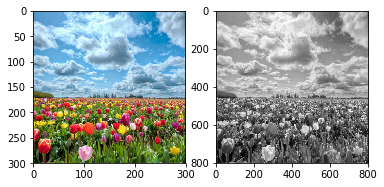

(300, 300, 3)


In [2]:
def resize_image(img, desired_size):
    old_size = img.size

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    img = img.resize(new_size, Image.ANTIALIAS)
    new_im = Image.new("RGB", (desired_size, desired_size))
    new_im.paste(img,((desired_size-new_size[0])//2, (desired_size-new_size[1])//2))
    img_array = np.asarray(new_im)
    return img_array

def convert_to_gray(img):
    img_gs = img.convert("L")
    img_gs_array = np.asarray(img_gs)
    return img_gs_array

def display_image(img, img_g):
    fig = plt.figure()
    ax = fig.add_subplot(1,2,1)
    plt.imshow(img)
    ax = fig.add_subplot(1,2,2)
    plt.imshow(img_g, cmap="gray")
    plt.show()

img = Image.open('Images/scene8.jpeg')
desired_size = 300
img_array = resize_image(img, desired_size)
img_gray = convert_to_gray(img)
display_image(img_array, img_gray)
print(img_array.shape)

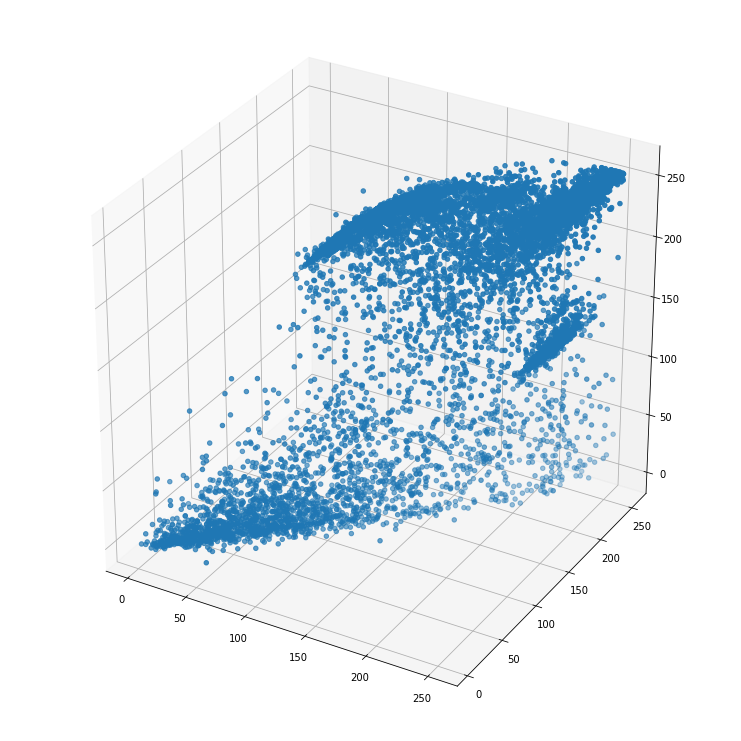

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import cv2

#read image
img = cv2.imread('Images/scene11.jpeg')
img = cv2.resize(img,(100,100))
#convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#get rgb values from image to 1D array
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()

#plotting 
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

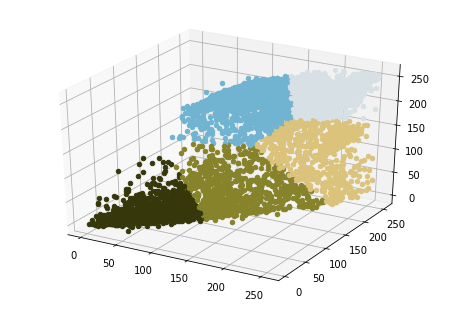

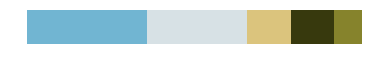

[[113 180 210]
 [ 54  56  12]
 [215 225 229]
 [219 195 124]
 [134 131  43]]


In [17]:
from sklearn.cluster import KMeans

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
        
    def dominantColors(self):
    
        #read image
        img = cv2.imread(self.IMAGE)
        img = cv2.resize(img,(100,100))
        
        #convert to rgb from bgr
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)
    
    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    
    def plotClusters(self):
        #plotting 
        fig = plt.figure()
        ax = Axes3D(fig)        
        for label, pix in zip(self.LABELS, self.IMAGE):
            ax.scatter(pix[0], pix[1], pix[2], color = self.rgb_to_hex(self.COLORS[label]))
        plt.show()
        
    def plotHistogram(self):
       
        #labels form 0 to no. of clusters
        numLabels = np.arange(0, self.CLUSTERS+1)
       
        #create frequency count tables    
        (hist, _) = np.histogram(self.LABELS, bins = numLabels)
        hist = hist.astype("float")
        hist /= hist.sum()
        
        #appending frequencies to cluster centers
        colors = self.COLORS
        
        #descending order sorting as per frequency count
        colors = colors[(-hist).argsort()]
        hist = hist[(-hist).argsort()] 
        
        #creating empty chart
        chart = np.zeros((50, 500, 3), np.uint8)
        start = 0
        
        #creating color rectangles
        for i in range(self.CLUSTERS):
            end = start + hist[i] * 500
            
            #getting rgb values
            r = colors[i][0]
            g = colors[i][1]
            b = colors[i][2]
            
            #using cv2.rectangle to plot colors
            cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
            start = end	
        
        #display chart
        plt.figure()
        plt.axis("off")
        plt.imshow(chart)
        plt.show()

img = 'Images/scene11.jpeg'
clusters = 5
dc = DominantColors(img, clusters)
colors = dc.dominantColors()
dc.plotClusters()
dc.plotHistogram()
print(colors)